<a href="https://www.kaggle.com/code/azminetoushikwasi/classification-comparing-different-algorithms?scriptVersionId=102631808" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;color:white;margin:0;font-size:350%;text-align:center;display:fill;border-radius:5px;background-color:#0e3848;overflow:hidden;font-weight:600">Classification ➡️ Comparing Different Algorithms</div>

<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#06445c;overflow:hidden;font-weight:500">Introduction</div>

# 1. Introduction

In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. Examples of classification problems include: Given an example, classify if it is spam or not. Given a handwritten character, classify it as one of the known characters.

### Binary classification
**Binary classification refers to those classification tasks that have two class labels.**

Examples include:
- Email spam detection (spam or not).
- Churn prediction (churn or not).
- Conversion prediction (buy or not).

Typically, binary classification tasks involve one class that is the normal state and another class that is the abnormal state.

For example “not spam” is the normal state and “spam” is the abnormal state. Another example is “cancer not detected” is the normal state of a task that involves a medical test and “cancer detected” is the abnormal state.

The class for the normal state is assigned the class label 0 and the class with the abnormal state is assigned the class label 1. It is common to model a binary classification task with a model that predicts a Bernoulli probability distribution for each example.

The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1. For classification, this means that the model predicts a probability of an example belonging to class 1, or the abnormal state.

<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#06445c;overflow:hidden;font-weight:500">Popular algorithms</div>

# 2. Popular algorithms

Popular algorithms that can be used for binary classification include:
- Logistic Regression
- k-Nearest Neighbors
- Decision Trees
- Support Vector Machine
- Naive Bayes

Some algorithms are specifically designed for binary classification and do not natively support more than two classes; examples include Logistic Regression and Support Vector Machines.

<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#06445c;overflow:hidden;font-weight:500">Data and Modules</div>

# 3. Data and Modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/kaggle/input/tabular-playground-series-aug-2022/train.csv")
df_test=pd.read_csv("/kaggle/input/tabular-playground-series-aug-2022/test.csv")
ss=pd.read_csv("/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv")

<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#06445c;overflow:hidden;font-weight:500">Basic Exploration</div>

# 4. Basic Exploration

In [3]:
df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


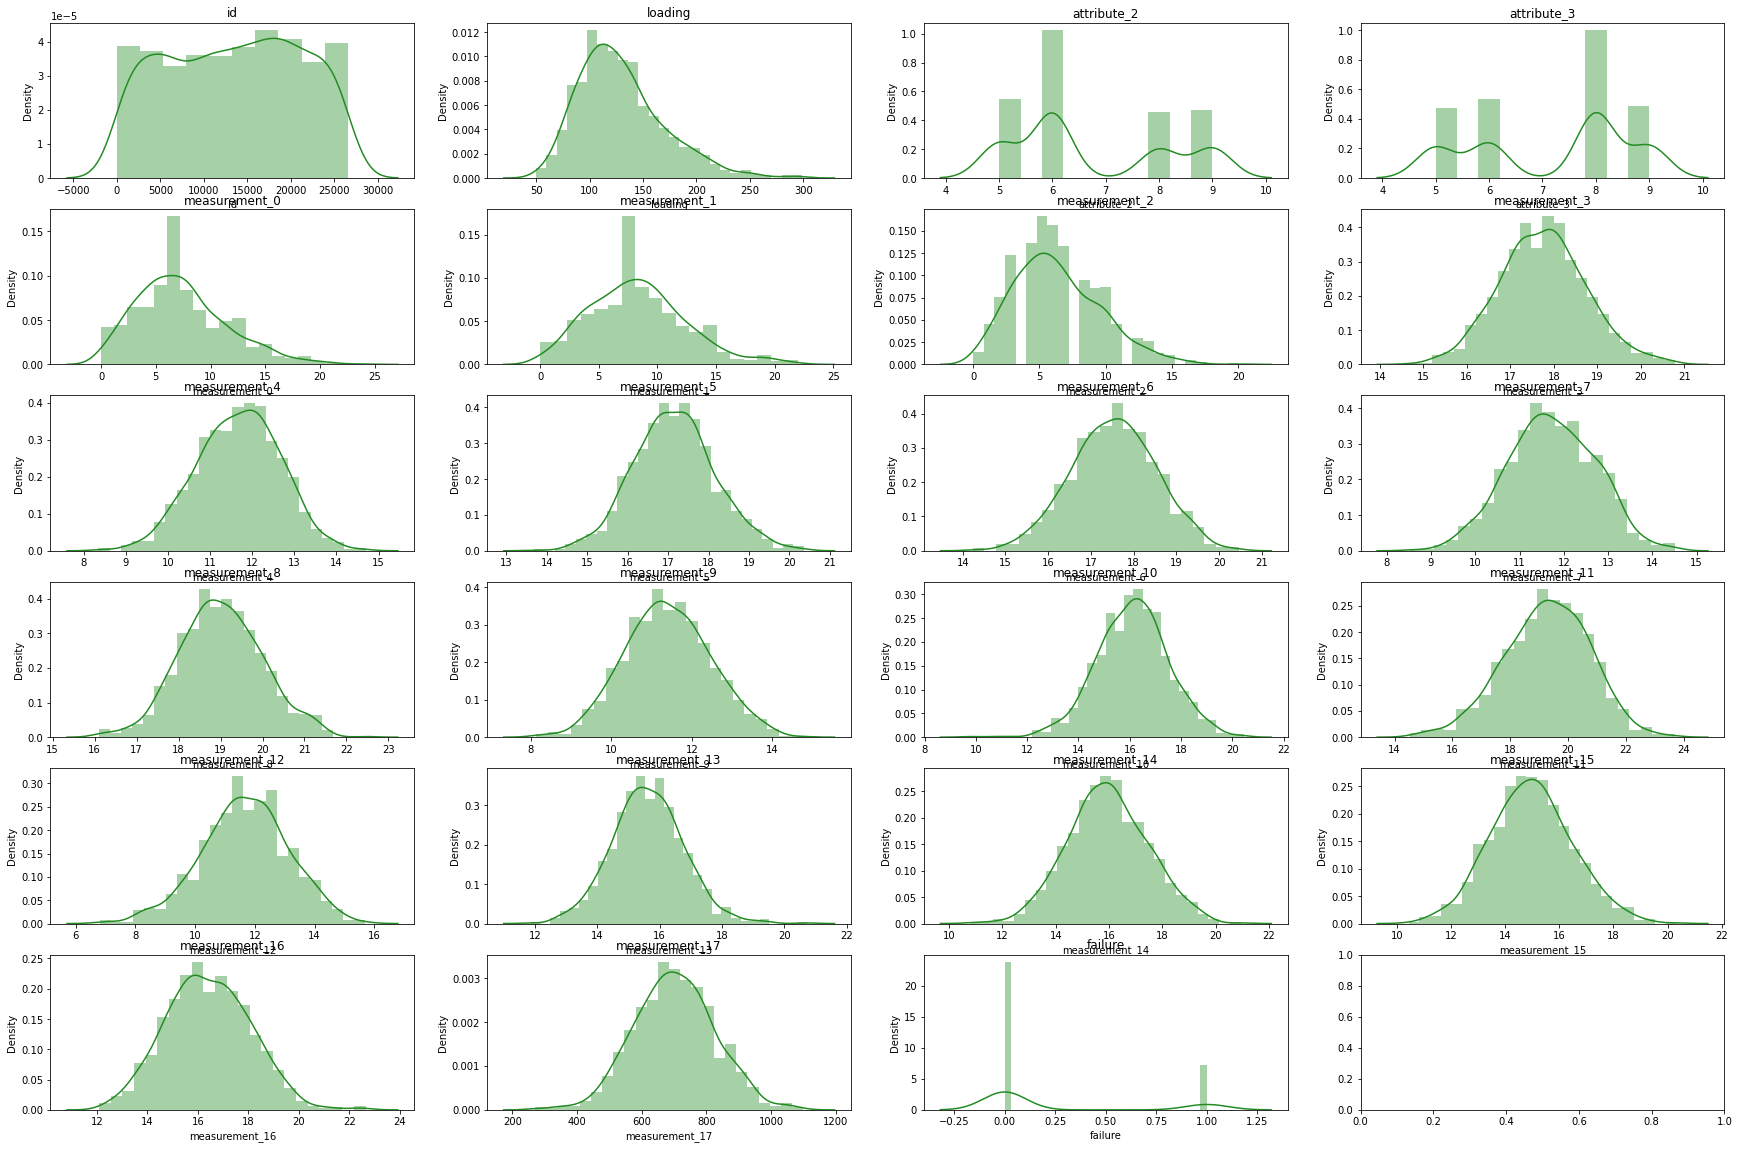

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf=newdf.sample(1000)


fig, axes = plt.subplots(nrows = 6, ncols = 4)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30, 20)

for ax, col in zip(axes, newdf.columns):
  sns.distplot(newdf[col], ax = ax, color='forestgreen')
  ax.set_title(col)

<AxesSubplot:>

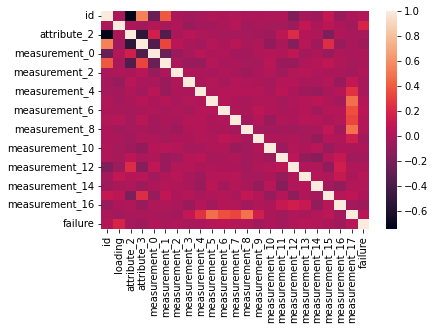

In [5]:
sns.heatmap(newdf.corr())

In [6]:
numerics_col_list = list(df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)
cat_col_list = list(set(df.columns)-set(numerics_col_list))
df=df.dropna()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_trans = Pipeline(steps = [('imputer', SimpleImputer(strategy='mean'))])
cat_trans = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'most_frequent')),
                                       (('odi', (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = np.nan))))])
transformer = ColumnTransformer(transformers=[("num", num_trans, numerics_col_list),
                                           ("cat", cat_trans, cat_col_list)])
df = pd.DataFrame(transformer.fit_transform(df), columns = (numerics_col_list+cat_col_list))
df=df.drop(['id'],axis=1)
y=df['failure']
X=df.drop(['failure'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#06445c;overflow:hidden;font-weight:500">Binary Classification Algorithms</div>

# 5. Binary Classification Algorithms

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#03648a;overflow:hidden;font-weight:800">Naive Bayes</div>

# 5.1. Naive Bayes
The Naive Bayes method is a supervised learning algorithm based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.
Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

![](https://static.javatpoint.com/tutorial/machine-learning/images/naive-bayes-classifier-algorithm-4.png)

## When use this model?
The fundamental Naïve Bayes assumption is that each feature makes an: independent and equal contribution to the outcome.

What it does mean that? This mean that when you have several features and they are independent, they are not correlated, and none of the attributes are irrelevant and assumed to be contributing Equally to the outcome.

Due to the independence assumption is never correct we call Naive. This model works particularly well with natural language processing (NLP) problems. Because we can assume

The order of the words in document X makes no difference but repetitions of words do. (Bag of Words assumption )
Words appear independently of each other, given the document class (Conditional Independence ).
There are different types , among common types are:

a) Multinomial Naïve Bayes Classifier Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification.

b) Bernoulli Naïve Bayes Classifier In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence (i.e. a word occurs in a document or not) features are used rather than term frequencies (i.e. frequency of a word in the document).

c) Gaussian Naïve Bayes Classifier In Gaussian Naïve Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution (Normal distribution).

## Code Example

In [9]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(x_train, y_train)
print("score on test: " + str(mnb.score(x_test, y_test)))
print("score on train: "+ str(mnb.score(x_train, y_train)))

score on test: 0.6946815495732108
score on train: 0.6828280617270439


## Summary
The Naive Bayes algorithm is very fast for this feature rich dataset (remember we have a tensor with 10,000 feature vectors) and already provides a good result of above 80%. The score on the training and test data are close to each other, which indicates that the we are not overfitting.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#03648a;overflow:hidden;font-weight:800">Logistic Regression</div>

# 5.2. Logistic Regression

Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

For example, for classifying an email, the algorithm will use the words in the email as features and based on that make a prediction whether the email is spam or not.

Logistic Regression is a supervised Machine Learning algorithm, which means the data provided for training is labeled i.e., answers are already provided in the training set. The algorithm learns from those examples and their corresponding answers (labels) and then uses that to classify new examples.

In mathematical terms, suppose the dependent variable is Y and the set of independent variables is X, then logistic regression will predict the dependent variable P(Y=1) as a function of X, the set of independent variables.



![](https://pimages.toolbox.com/wp-content/uploads/2022/04/11040522/46-4.png)

## Code Example

In [10]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
print("score on test: " + str(lr.score(x_test, y_test)))
print("score on train: "+ str(lr.score(x_train, y_train)))

score on test: 0.788903479973736
score on train: 0.7904126080770494


## Summary
The Logistic Regression takes quite a long time to train and does overfit. That the algorithm overfits can be seen in the deviation of the train data score (98%) to test data score (86%).

## When use this model?
Well, if the distribution of the data may be distributed this logistic function, or like the sigmoid function, the the outputs may behave as the previous two formulas then this may be a good candidate to test. The logistic regression is a probabilistic approach.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#03648a;overflow:hidden;font-weight:800">K-Nearest Neighbours</div>

# 5.3. K-Nearest Neighbours
K-Nearest Neighbour (K-NN ) algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

## When use this model?
Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset. 


![](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png)

## Code Examples :

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(x_train, y_train)
print("train shape: " + str(x_train.shape))
print("score on test: " + str(knn.score(x_test, y_test)))
print("score on train: "+ str(knn.score(x_train, y_train)))

train shape: (9137, 24)
score on test: 0.742284963887065
score on train: 0.8098938382401226


## Summary: 
As expected, this algorithm is not very well-suited for this kind of prediction problem. It takes 12 minutes, it predicts very poorly with only 62%, and shows overfitting tendencies.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#03648a;overflow:hidden;font-weight:800">Support Vector Machine</div>

# 5.4. Support Vector Machine

Support vector machine is based on statistical approaches. Her we try to find a hyperplane that best separates the two classes.
SVM finding the maximum margin between the hyperplanes that means maximum distances between the two classes.
SVM works best when the dataset is small and complex.
When the data is perfectly linearly separable only then we can use Linear SVM.
When the data is not linearly separable then we can use Non-Linear SVM, which means when the data points cannot be separated into 2 classes by using a a linear approach.

The Support Vector Machine is a simple algorithm for classification and regression tasks. It can provide high accuracy with less computation power very fast. Due to the large number of features, we are using the LinearSVC. It turned out that setting the regularisation parameter C=0.0001 improves the quality of the prediction and reduces overfitting.

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

![](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

## Code Example

In [12]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(x_train, y_train)
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

score on test: 0.7895600787918582
score on train: 0.7905220531903251


## Summary
The Support Vector Machine is very fast, gives a high score for prediction and shows no overfitting issues.

## When use this model?
We can use SVM when a number of features are high compared to a number of data points in the dataset. By using the correct kernel and setting an optimum set of parameters. It is effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#03648a;overflow:hidden;font-weight:800">Decision Tree</div>

# 5.5. Decision Tree

A Decision Tree is a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules (if-else) inferred from the data features.

![](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)

Decision trees can perform both classification and regression tasks, so you’ll see authors refer to them as CART algorithm: Classification and Regression Tree. This is an umbrella term, applicable to all tree-based algorithms, not just decision trees.

But let’s focus on decision trees for classification.

The intuition behind Decision Trees is that you use the dataset features to create yes/no questions and continually split the dataset until you isolate all data points belonging to each class.

With this process you’re organizing the data in a tree structure.

Every time you ask a question you’re adding a node to the tree. And the first node is called the root node.

The result of asking a question splits the dataset based on the value of a feature, and creates new nodes.

If you decide to stop the process after a split, the last nodes created are called leaf nodes.

## When use this model?
When you don’t need to prepare the data before building the model and when your dataset can have a mix of numerical and categorical data, and you won’t need to encode any of the categorial features.

However you should take into account that Decision tree models are often biased toward splits on features having a large number of levels. Small changes in the training data can result in large changes to decision logic and large trees can be difficult to interpret and the decisions they make may seem counter intuitive.

#### Among some uses are in:
- Biomedical Engineering (decision trees for identifying features to be used in implantable devices).
- Financial analysis (Customer Satisfaction with a product or service).
- Astronomy (classify galaxies).
- System Control.
- Manufacturing and Production (Quality control, Semiconductor manufacturing, etc).
- Medicines (diagnosis, cardiology, psychiatry).
- Physics (Particle detection).

## Code Example:

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))

score on test: 0.6615233092580434
score on train: 1.0


## Summary: 
Applying a single decision tree to this feature rich dataset leads to massive overfitting. Indeed, an accuracy of 100% means it has remembered exactly the training dataset and is therefore generalising poorly on the test data. What we can see here is one of the cons of single decision tree which can’t handle data with too many features.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#03648a;overflow:hidden;font-weight:800">Bagging Decision Tree</div>

# 5. 6. Bagging Decision Tree

When a decision tree overfits, applying an ensemble learning algorithm like bagging might improve the quality of the prediction model. In bagging, the training data is increased by taking bootstraps from the training data. This means multiple samples are taken (with replacement) from the training data and the model is trained on these sub-datasets. The final prediction is the average over all predictions from each bootstrap sample.

![](https://bradleyboehmke.github.io/HOML/images/Boston-6-trees.png)

Bootstrap aggregating, also called bagging, is one of the first ensemble algorithms28 machine learning practitioners learn and is designed to improve the stability and accuracy of regression and classification algorithms. By model averaging, bagging helps to reduce variance and minimize overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method.

## Code Example:

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(x_train, y_train)
print("score on test: " + str(bg.score(x_test, y_test)))
print("score on train: "+ str(bg.score(x_train, y_train)))

score on test: 0.7764281024294156
score on train: 0.8894604355915509


## Summary: 
The Bagging Classifier is much slower as it basically runs 10 decision trees but one can see a reduction of the overfitting we saw on the single Decision Tree and an increase in the test score. Play around with the parameters to further improve this result.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#03648a;overflow:hidden;font-weight:800">Boosting Decision Tree</div>

# 5.7. Boosting Decision Tree

In general, we can’t use Boosting to improve a completely overfitted model with score = 1. To apply Boosting, we first have to tweak the decision tree classifier a bit. It took me some trial and error until I got the best parameters for the Decision Tree and the AdaBoost Classifier. I am sure you can further improve by playing around a bit more.

![](https://www.researchgate.net/profile/Mahsa-Shoaran/publication/325632132/figure/fig2/AS:639244859093006@1529419259793/Schematic-diagram-of-a-boosted-ensemble-of-decision-trees.png)

Boosting means that each tree is dependent on prior trees. The algorithm learns by fitting the residual of the trees that preceded it. Thus, boosting in a decision tree ensemble tends to improve accuracy with some small risk of less coverage. This component is based on the LightGBM algorithm.

## Code Example

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(x_train, y_train)
print("score on test: " + str(adb.score(x_test, y_test)))
print("score on train: "+ str(adb.score(x_train, y_train)))

score on test: 0.783650689428759
score on train: 0.7964320893072124


## Summary: 
With Boosting and the improved underlying, decision tree we got rid of the overfitting. Even though we can only predict with a certainty of around 80%, we can do this solid on all test data.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#03648a;overflow:hidden;font-weight:800"> Random Forest</div>

# 5. 8. Random Forest
The Random Forest Algorithm is another frequently used ensemble learning classifier which uses multiple decision trees. The Random Forest classifier is basically a modified bagging algorithm of a Decision Tree that selects the subsets differently. I found out that max_depth=9 is a good value for this feature-rich dataset.

![](https://miro.medium.com/max/1200/1*hmtbIgxoflflJqMJ_UHwXw.jpeg)

 A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

## Code Example

In [16]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(x_train, y_train)
print("score on test: " + str(rf.score(x_test, y_test)))
print("score on train: "+ str(rf.score(x_train, y_train)))

score on test: 0.7895600787918582
score on train: 0.7921637298894605


## Summary: 
The Random Forest does not overfit and has a prediction score that is comparable to that of the Boosted Decision Tree but it performs much better as it is more than a magnitude faster (15 times faster).

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#03648a;overflow:hidden;font-weight:800">Voting Classifier </div>

# 5.9. Voting Classifier 

This classifier from the ensemble learning toolbox evaluates different classifiers and selects the best out of it

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities to predict the class labels. Such a classifier can be useful for a set of equally well performing models in order to balance out their individual weaknesses.
(citation from: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

So let’s use this classifier to combine some of the models we had so far and apply the Voting Classifier on

- Naive Bayes (84%, 2s)
- Logistic Regression (86%, 60s, overfitting)
- Random Forest (80%, 20s)
- Support Vector Machine (85%, 10s)

Be aware that for this code snippet, all used model definitions have to be loaded in the Python kernel.

A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator. The aggregating criteria can be combined decision of voting for each estimator output.

![](https://miro.medium.com/max/1400/1*I7NsQXwyR36XK62s1iDNzQ.png)

## Code Example

In [17]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(x_train, y_train)
print("score on test: " + str(evc.score(x_test, y_test)))
print("score on train: "+ str(evc.score(x_train, y_train)))

score on test: 0.7895600787918582
score on train: 0.7905220531903251


## Summary: 
Even if it is overfitting a bit, it got the best prediction score on the test data so far.

<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#06445c;overflow:hidden;font-weight:500">References</div>

# 6. References

 - [4 Types of Classification Tasks in Machine Learning](https://machinelearningmastery.com/types-of-classification-in-machine-learning/#:~:text=In%20machine%20learning%2C%20classification%20refers,one%20of%20the%20known%20characters.)
 - [Top 10 Binary Classification Algorithms [a Beginner’s Guide]](https://towardsdatascience.com/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2)
 - [Correcting Class Imbalanced Data For Binary Classification Problems](https://analyticsindiamag.com/correcting-class-imbalanced-data-for-binary-classification-problems-demonstrations-using-animated-videos/)
 - [Naive Bayes Classifiers](https://www.geeksforgeeks.org/naive-bayes-classifiers/)
 - [ML | Logistic Regression using Python](https://www.geeksforgeeks.org/ml-logistic-regression-using-python/)
 - [Introduction to Classification Algorithms](https://www.edureka.co/blog/classification-algorithms/)
 - [Classification Algorithm in Machine Learning](https://www.javatpoint.com/classification-algorithm-in-machine-learning)
 - [The best machine learning model for binary classification](https://ruslanmv.com/blog/The-best-binary-Machine-Learning-Model)
 - [7 Types of Classification Algorithms in Machine Learning](projectpro.io/article/7-types-of-classification-algorithms-in-machine-learning/435)
 - [Binary Classification](https://www.learndatasci.com/glossary/binary-classification/)
 - [Support Vector Machine — Introduction to Machine Learning Algorithms](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)
 - [Support Vector Machine Algorithm](https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm)
 - [Decision Tree Classifier explained in real-life: picking a vacation destination](https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575)
 - [Bagging](https://bradleyboehmke.github.io/HOML/bagging.html)
 - [Gradient Boosting](https://bradleyboehmke.github.io/HOML/gbm.html)
 - [Use Voting Classifier to improve the performance of your ML model](https://towardsdatascience.com/use-voting-classifier-to-improve-the-performance-of-your-ml-model-805345f9de0e)
 - [Model Performance boosting with Voting-Classifier](https://medium.com/analytics-vidhya/performance-boosting-with-voting-classifier-ea69313a367c)

<div style="padding:60px;color:white;margin:50px;font-size:500%;text-align:center;display:fill;border-radius:5px;background-color:#06445c;overflow:hidden;font-weight:800">Upvote, Comment, Share</div>